# Installs & Imports

In [1]:
!pip install -q torch torchvision xgboostlss plotnine shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 114.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 96.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 47.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotnine
from plotnine import *
import torch
import multiprocessing
import os

from sklearn import datasets
from sklearn.model_selection import train_test_split
import xgboost as xgb

from xgboostlss.model import XGBoostLSS
from xgboostlss.distributions.Gamma import Gamma
from xgboostlss.distributions.Gaussian import Gaussian
from xgboostlss.distributions.Mixture import Mixture
from xgboostlss.distributions.mixture_distribution_utils import MixtureDistributionClass
from xgboostlss.distributions.Expectile import Expectile

In [3]:
# Print number of available CPUs
n_cpu = multiprocessing.cpu_count()
print(f"Number of CPUs: {n_cpu}")

# Configuration for plotnine visualizations
plotnine.options.figure_size = (10, 5)

Number of CPUs: 8


# Load the Data

In [4]:
# Load the California Housing Dataset
housing_data = datasets.fetch_california_housing()

# Convert to DataFrame
housing_df = pd.DataFrame(housing_data['data'], columns=housing_data['feature_names'])
housing_df['MedHouseVal'] = housing_data['target']

# Display the DataFrame
display(housing_df.head(10))

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
5  4.0368      52.0  4.761658   1.103627       413.0  2.139896     37.85   
6  3.6591      52.0  4.931907   0.951362      1094.0  2.128405     37.84   
7  3.1200      52.0  4.797527   1.061824      1157.0  1.788253     37.84   
8  2.0804      42.0  4.294118   1.117647      1206.0  2.026891     37.84   
9  3.6912      52.0  4.970588   0.990196      1551.0  2.172269     37.84   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
5    -122.25        2.697  
6    -122.25        2.992  
7    -122.25        2.414  
8    -122.26        2.267  
9    -122.25        2.611

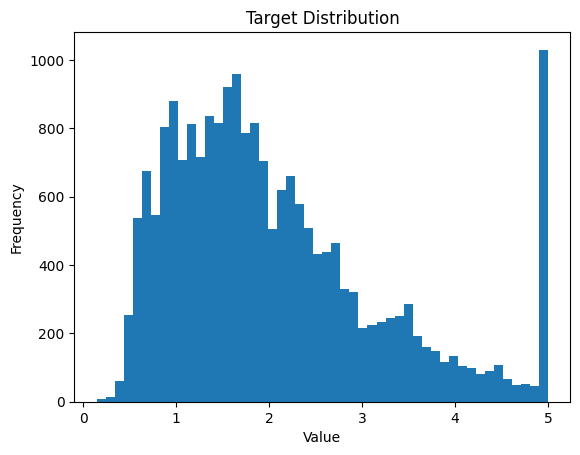

In [5]:
# Plot the target distribution
housing_df['MedHouseVal'].plot(kind='hist', bins=50, title='Target Distribution')
plt.title('Target Distribution')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Prepare the Data

In [6]:
# Define features and target
X = housing_df.drop('MedHouseVal', axis=1)
y = housing_df['MedHouseVal']

In [7]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Print the shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (16512, 8)
y_train shape: (16512,)
X_test shape: (4128, 8)
y_test shape: (4128,)


In [8]:
# Create model-specific datasets
dtrain_xgb = xgb.DMatrix(X_train, label=y_train)
dtest_xgb = xgb.DMatrix(X_test)

# Gamma Regression

In [9]:
# Initialize with Gamma distribution
xgblss_gamma = XGBoostLSS(
    Gamma(
        stabilization='L2',
        response_fn='exp',
        loss_fn='nll'
    )
)

In [10]:
# Define parameter search spaces
param_dict_xgb = {
    "eta":              ["float", {"low": 1e-5,   "high": 1,     "log": True}],
    "max_depth":        ["int",   {"low": 1,      "high": 10,    "log": False}],
    "gamma":            ["float", {"low": 1e-8,   "high": 40,    "log": True}],
    "subsample":        ["float", {"low": 0.2,    "high": 1.0,   "log": False}],
    "colsample_bytree": ["float", {"low": 0.2,    "high": 1.0,   "log": False}],
    "min_child_weight": ["float", {"low": 1e-8,   "high": 500,   "log": True}],
    "booster":          ["categorical", ["gbtree"]],
}

In [11]:
# Hyperparameter optimization
np.random.seed(123)

opt_param_xgb_gamma = xgblss_gamma.hyper_opt(
    param_dict_xgb,
    dtrain_xgb,
    num_boost_round=100,
    nfold=5,
    early_stopping_rounds=20,
    max_minutes=5,
    n_trials=30,
    silence=False,
    seed=123,
    hp_seed=None
)

opt_params_xgb_gamma = opt_param_xgb_gamma.copy()
n_rounds_gamma = opt_params_xgb_gamma["opt_rounds"]
del opt_params_xgb_gamma["opt_rounds"]

[I 2024-12-05 05:27:42,592] A new study created in memory with name: XGBoostLSS Hyper-Parameter Optimization


  0%|          | 0/30 [00:00<?, ?it/s]

[I 2024-12-05 05:27:48,253] Trial 0 finished with value: 3786.2462892000003 and parameters: {'eta': 0.004126552063177044, 'max_depth': 2, 'gamma': 0.006450959247875694, 'subsample': 0.7197796670865444, 'colsample_bytree': 0.46762319386589973, 'min_child_weight': 0.002865755449768914, 'booster': 'gbtree'}. Best is trial 0 with value: 3786.2462892000003.
[I 2024-12-05 05:27:51,875] Trial 1 finished with value: 4333.845507800001 and parameters: {'eta': 0.002516729240715373, 'max_depth': 1, 'gamma': 1.0774251236095234, 'subsample': 0.22858999603348, 'colsample_bytree': 0.37318426963645596, 'min_child_weight': 8.118878299069616, 'booster': 'gbtree'}. Best is trial 0 with value: 3786.2462892000003.
[I 2024-12-05 05:27:53,583] Trial 2 finished with value: 3237.7666992 and parameters: {'eta': 0.2806515855860848, 'max_depth': 3, 'gamma': 6.90074748911881e-05, 'subsample': 0.8648096990604432, 'colsample_bytree': 0.414579142194167, 'min_child_weight': 5.644269586259801, 'booster': 'gbtree'}. Best

invalid value encountered in subtract


[I 2024-12-05 05:28:39,380] Trial 13 finished with value: 1945131036.8 and parameters: {'eta': 0.9723052907370145, 'max_depth': 6, 'gamma': 1.232346861840001e-07, 'subsample': 0.20823096239629726, 'colsample_bytree': 0.6603031445500425, 'min_child_weight': 6.294806227003502e-06, 'booster': 'gbtree'}. Best is trial 10 with value: 2362.0882814.
[I 2024-12-05 05:28:43,493] Trial 14 finished with value: 2642.6245606 and parameters: {'eta': 0.02375697316597233, 'max_depth': 4, 'gamma': 1.2890543688064985e-06, 'subsample': 0.6325733076062415, 'colsample_bytree': 0.7222354645820666, 'min_child_weight': 9.510660450440725e-06, 'booster': 'gbtree'}. Best is trial 10 with value: 2362.0882814.
[I 2024-12-05 05:28:48,402] Trial 15 finished with value: 2630.9559080000004 and parameters: {'eta': 0.01708862724683261, 'max_depth': 7, 'gamma': 1.3971662690379004e-06, 'subsample': 0.3545024774766621, 'colsample_bytree': 0.5494067183964705, 'min_child_weight': 4.3832187618280845e-07, 'booster': 'gbtree'}.

invalid value encountered in subtract


[I 2024-12-05 05:28:57,666] Trial 19 pruned. Trial was pruned at iteration 20.
[I 2024-12-05 05:28:59,732] Trial 20 finished with value: 3212.3751954 and parameters: {'eta': 0.10995969005800557, 'max_depth': 9, 'gamma': 1.513395993696647e-07, 'subsample': 0.28439620159304013, 'colsample_bytree': 0.666258025016388, 'min_child_weight': 1.1765090764598216e-06, 'booster': 'gbtree'}. Best is trial 10 with value: 2362.0882814.
[I 2024-12-05 05:29:03,869] Trial 21 finished with value: 2481.0056642 and parameters: {'eta': 0.030641385553561825, 'max_depth': 5, 'gamma': 2.843559033561349e-08, 'subsample': 0.28637415946734934, 'colsample_bytree': 0.6235320141556981, 'min_child_weight': 2.078828874446173e-08, 'booster': 'gbtree'}. Best is trial 10 with value: 2362.0882814.
[I 2024-12-05 05:29:07,935] Trial 22 finished with value: 2287.0683103999995 and parameters: {'eta': 0.053090006001690136, 'max_depth': 4, 'gamma': 2.3832569401939213e-08, 'subsample': 0.27237126834720643, 'colsample_bytree': 0.

In [12]:
# Train the model
xgblss_gamma.train(
    opt_params_xgb_gamma,
    dtrain_xgb,
    num_boost_round=n_rounds_gamma
)

In [13]:
torch.manual_seed(123)

# Number of samples to draw from predicted distribution
n_samples = 1000
selected_quantiles = [0.05, 0.95]

In [14]:
# Sample from predicted distribution
pred_samples_gamma = xgblss_gamma.predict(
    dtest_xgb,
    pred_type="samples",
    n_samples=n_samples,
    seed=123
)

In [15]:
# Calculate quantiles from predicted distribution
pred_quantiles_gamma = xgblss_gamma.predict(
    dtest_xgb,
    pred_type="quantiles",
    n_samples=n_samples,
    quantiles=selected_quantiles
)

In [16]:
# Retrieve predicted distributional parameters
pred_params_gamma = xgblss_gamma.predict(
    dtest_xgb,
    pred_type="parameters"
)

In [17]:
# Display first few rows of predictions
print("Sample Predictions:")
display(pred_samples_gamma.head())
print("\nQuantile Predictions:")
display(pred_quantiles_gamma.head())
print("\nParameter Predictions:")
display(pred_params_gamma.head())

Sample Predictions:


y_sample0  y_sample1  y_sample2  y_sample3  y_sample4  y_sample5  \
0   1.877042   2.165550   1.094813   2.281375   2.409082   1.623675   
1   0.950545   0.261801   1.041147   0.776074   1.566735   0.790923   
2   1.179376   3.247450   1.803066   2.219409   1.306015   1.699942   
3   1.997082   3.626471   1.824216   2.206463   1.800680   1.597876   
4   4.359257   3.554177   3.660336   4.925179   3.728509   3.252389   

   y_sample6  y_sample7  y_sample8  y_sample9  ...  y_sample990  y_sample991  \
0   1.431146   1.360191   1.702772   0.969539  ...     2.311064     1.761075   
1   0.748807   0.529338   0.536274   0.940150  ...     1.998585     1.130309   
2   2.112865   2.671697   1.442771   1.339200  ...     1.226410     1.718078   
3   1.641497   2.087441   1.957465   2.754330  ...     1.327363     1.396169   
4   3.679590   2.971080   4.447114   3.746411  ...     5.889720     4.945680   

   y_sample992  y_sample993  y_sample994  y_sample995  y_sample996  \
0     2.530682     2.064025     1.679303     3.491935     2.346450   
1     0.504467     0.499857     0.684712     0.956989     1.148381   
2     1.576056     1.594139     1.721030     1.452607     1.920102   
3     2.485324     2.227974     1.283417     1.792713     1.306925   
4     3.137970     3.708328     4.934381     3.850679     3.373797   

   y_sample997  y_sample998  y_sample999  
0     1.896464     2.309303     1.514516  
1     1.309996     0.938605     1.075505  
2     1.907705     1.870945     1.545913  
3     2.095470     3.361473     1.340216  
4     3.025335     3.451573     2.940155  

[5 rows x 1000 columns]


Quantile Predictions:


quant_0.05  quant_0.95
0    1.109443    3.121961
1    0.463322    1.566774
2    1.012215    2.810894
3    1.032326    2.933088
4    2.440114    5.967394


Parameter Predictions:


concentration      rate
0      10.571455  5.266577
1       8.138558  8.570183
2      11.126835  6.206167
3       9.783940  5.061709
4      14.854641  3.622383

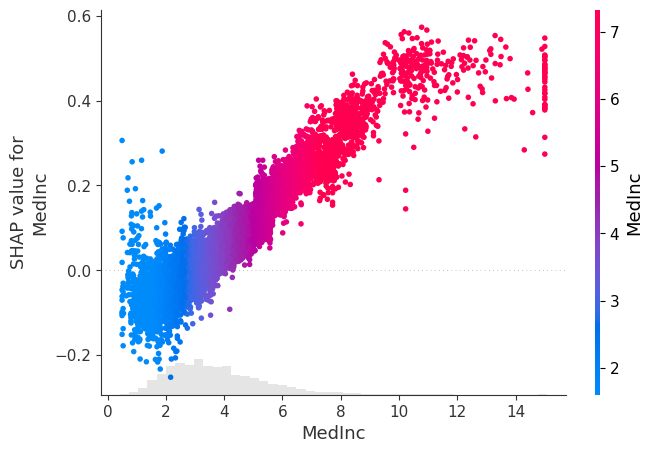

In [18]:
# Prepare DataFrame for Partial Dependence Plot
feature_names = housing_data['feature_names']
pdp_df = pd.DataFrame(X_train, columns=feature_names)

# Plot Partial Dependence for the first feature
xgblss_gamma.plot(
    pdp_df,
    parameter="concentration",
    feature=feature_names[0],
    plot_type="Partial_Dependence"
)

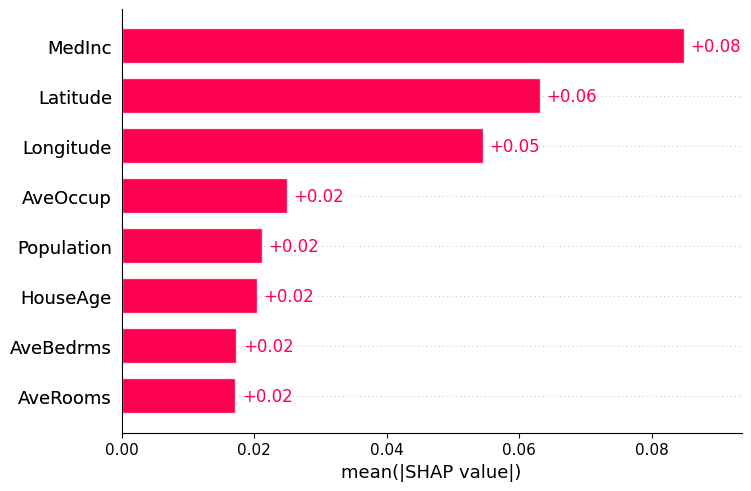

In [19]:
# Plot Feature Importance
xgblss_gamma.plot(
    pdp_df,
    parameter="concentration",
    plot_type="Feature_Importance"
)

# Gaussian Mixture Regression

In [20]:
# Define candidate distributions for mixture model
mix_dist_class = MixtureDistributionClass()
candidate_distributions = [
    Mixture(Gaussian(response_fn="softplus"), M=2),
    Mixture(Gaussian(response_fn="softplus"), M=3),
    Mixture(Gaussian(response_fn="softplus"), M=4),
]

Fitting of candidate distributions completed: 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]


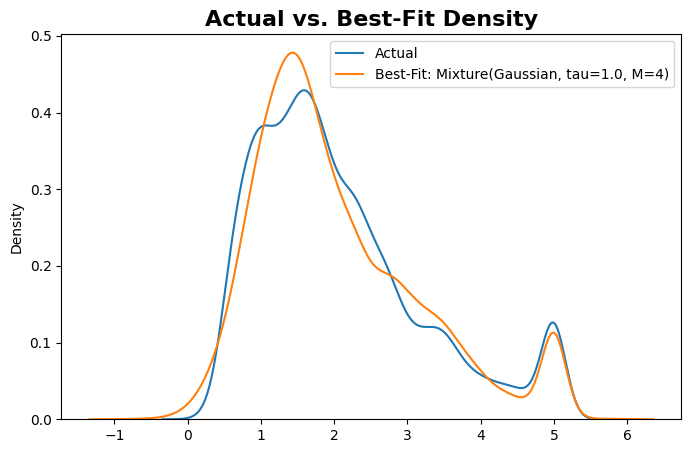

               nll                     distribution
rank                                               
1     13974.582031  Mixture(Gaussian, tau=1.0, M=4)
2     23268.496094  Mixture(Gaussian, tau=1.0, M=3)
3     23737.697266  Mixture(Gaussian, tau=1.0, M=2)


In [21]:
# Perform distribution selection
dist_nll = mix_dist_class.dist_select(
    target=y_train.values,
    candidate_distributions=candidate_distributions,
    max_iter=50,
    plot=True,
    figure_size=(8, 5)
)
print(dist_nll)

In [22]:
# Initialize with Gaussian Mixture
xgblss_gausmix = XGBoostLSS(
    Mixture(
        Gaussian(
            response_fn="softplus"
        ),
        M=4,
        tau=1.0
    )
)

In [23]:
# Hyperparameter optimization
np.random.seed(123)

opt_param_xgb_gausmix = xgblss_gausmix.hyper_opt(
    param_dict_xgb,
    dtrain_xgb,
    num_boost_round=100,
    nfold=5,
    early_stopping_rounds=20,
    max_minutes=60,
    n_trials=30,
    silence=True,
    seed=123
)

opt_params_xgb_gausmix = opt_param_xgb_gausmix.copy()
n_rounds_gausmix = opt_params_xgb_gausmix["opt_rounds"]
del opt_params_xgb_gausmix["opt_rounds"]

  0%|          | 0/30 [00:00<?, ?it/s]


Hyper-Parameter Optimization successfully finished.
  Number of finished trials:  30
  Best trial:
    Value: -9.591079800000006
    Params: 
    eta: 0.06249574288486176
    max_depth: 9
    gamma: 3.7375132174039227e-06
    subsample: 0.31584220538229657
    colsample_bytree: 0.7153342305914104
    min_child_weight: 16.610014282138387
    booster: gbtree
    opt_rounds: 44


In [24]:
# Train the model
xgblss_gausmix.train(
    opt_params_xgb_gausmix,
    dtrain_xgb,
    num_boost_round=n_rounds_gausmix
)

In [25]:
# Sample from predicted distribution
pred_samples_gausmix = xgblss_gausmix.predict(
    dtest_xgb,
    pred_type="samples",
    n_samples=n_samples,
    seed=123
)

In [26]:
# Calculate quantiles from predicted distribution
pred_quantiles_gausmix = xgblss_gausmix.predict(
    dtest_xgb,
    pred_type="quantiles",
    n_samples=n_samples,
    quantiles=selected_quantiles
)

In [27]:
# Retrieve predicted distributional parameters
pred_params_gausmix = xgblss_gausmix.predict(
    dtest_xgb,
    pred_type="parameters"
)

In [28]:
# Display first few rows of predictions
print("Sample Predictions:")
display(pred_samples_gausmix.head())
print("\nQuantile Predictions:")
display(pred_quantiles_gausmix.head())
print("\nParameter Predictions:")
display(pred_params_gausmix.head())

Sample Predictions:


y_sample0  y_sample1  y_sample2  y_sample3  y_sample4  y_sample5  \
0   2.565264   1.848381   2.218494   2.212538   2.394953   1.902736   
1   0.978514   0.796739   0.950954   0.881579   1.055501   1.001136   
2   1.394800   1.532187   1.162407   1.565068   1.465479   1.263461   
3   1.661358   2.168171   1.584371   1.841264   2.615950   1.448327   
4   2.555115   5.000011   2.581729   3.647282   3.928766   5.000011   

   y_sample6  y_sample7  y_sample8  y_sample9  ...  y_sample990  y_sample991  \
0   2.071859   1.878877   1.631014   2.860847  ...     3.059096     2.139562   
1   0.970840   1.258986   0.980168   0.977026  ...     1.118229     0.925266   
2   1.356244   1.672640   0.970575   1.336396  ...     1.160848     0.937304   
3   1.787736   1.139695   1.445052   2.253889  ...     1.725381     2.098713   
4   3.272076   3.900813   3.668880   3.961598  ...     3.121807     3.081208   

   y_sample992  y_sample993  y_sample994  y_sample995  y_sample996  \
0     2.167553     2.259020     2.243826     2.160500     2.482563   
1     0.933834     0.993054     2.666250     0.823488     0.830067   
2     1.353181     1.595923     1.551188     1.518563     1.320316   
3     1.485381     1.517402     1.822456     1.563771     1.329270   
4     5.000011     3.050658     4.687550     3.542769     4.329755   

   y_sample997  y_sample998  y_sample999  
0     2.330152     1.954926     1.752258  
1     0.689072     0.707436     1.075873  
2     1.591441     1.222586     1.433333  
3     1.907275     2.110814     1.544021  
4     3.145536     3.909295     5.000009  

[5 rows x 1000 columns]


Quantile Predictions:


quant_0.05  quant_0.95
0    1.771247    2.543645
1    0.689056    1.261468
2    1.013898    1.731051
3    1.239761    2.277505
4    2.574234    5.000011


Parameter Predictions:


loc_1     loc_2     loc_3     loc_4   scale_1   scale_2   scale_3  \
0  5.00001  1.132705  2.175554  2.077574  0.000001  0.190609  0.232970   
1  5.00001  1.132705  0.977659  1.535914  0.000001  0.190609  0.172198   
2  5.00001  1.132705  1.357972  1.337461  0.000001  0.190609  0.214794   
3  5.00001  1.132705  1.683415  2.304697  0.000001  0.190609  0.276633   
4  5.00001  1.132705  3.837229  3.472624  0.000001  0.190609  0.572256   

    scale_4  mix_prob_1    mix_prob_2  mix_prob_3  mix_prob_4  
0  0.333794    0.001901  2.298812e-06    0.915623    0.082473  
1  0.650945    0.000119  3.709571e-07    0.980332    0.019548  
2  0.297797    0.000261  2.785710e-06    0.928685    0.071051  
3  0.447372    0.004889  3.200053e-06    0.909305    0.085803  
4  0.662462    0.159327  7.744796e-05    0.375202    0.465393

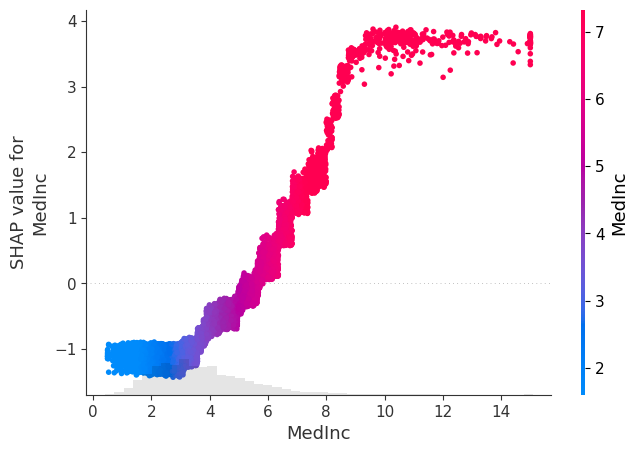

In [29]:
# Plot Partial Dependence for the first feature
xgblss_gausmix.plot(
    pdp_df,
    parameter="mix_prob_1",
    feature=feature_names[0],
    plot_type="Partial_Dependence"
)

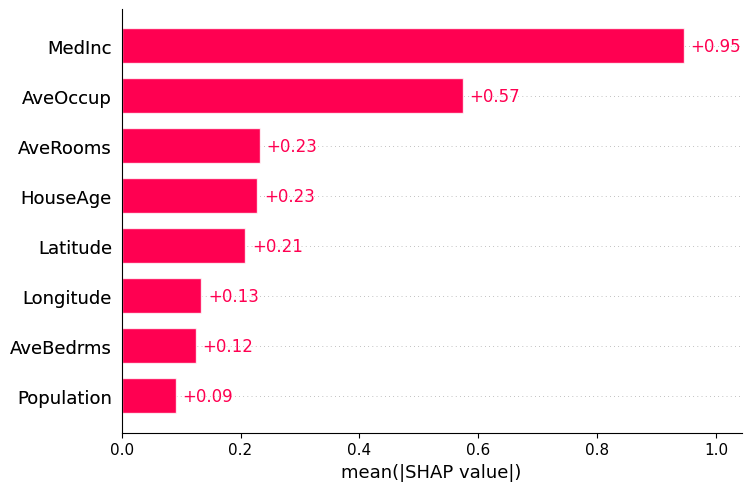

In [30]:
# Plot Feature Importance
xgblss_gausmix.plot(
    pdp_df,
    parameter="mix_prob_1",
    plot_type="Feature_Importance"
)

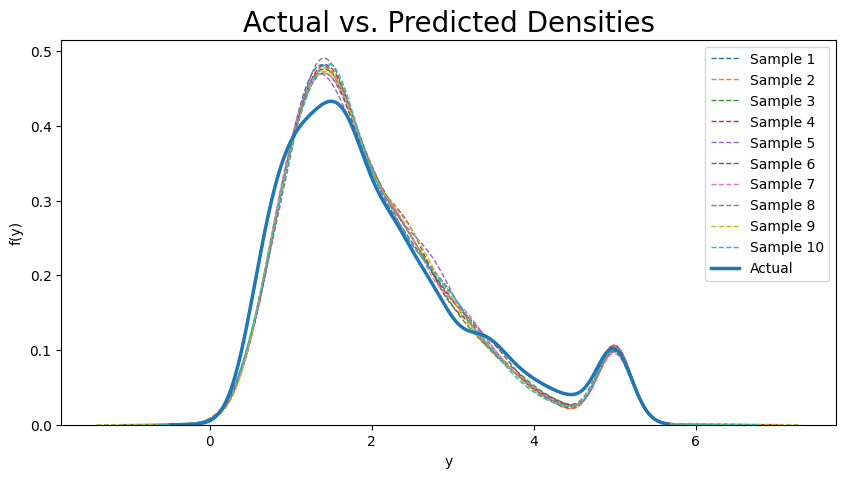

In [31]:
# Plot densities of predicted samples vs. actual values
n_subset = 10
pred_df = pred_samples_gausmix.iloc[:, :n_subset]
pred_df.columns = [f"Sample {i+1}" for i in range(n_subset)]
actual_df = pd.DataFrame(y_test.values, columns=["Actual"])
plot_df = pd.concat([pred_df, actual_df], axis=1)

linestyles = ["--"] * n_subset + ["solid"]
linewidths = [1] * n_subset + [2.5]

plt.figure(figsize=(10, 5))
for idx, col in enumerate(plot_df.columns):
    sns.kdeplot(plot_df[col], linestyle=linestyles[idx], lw=linewidths[idx], label=col)
plt.legend()
plt.title("Actual vs. Predicted Densities", fontsize=20)
plt.xlabel("y")
plt.ylabel("f(y)")
plt.show()

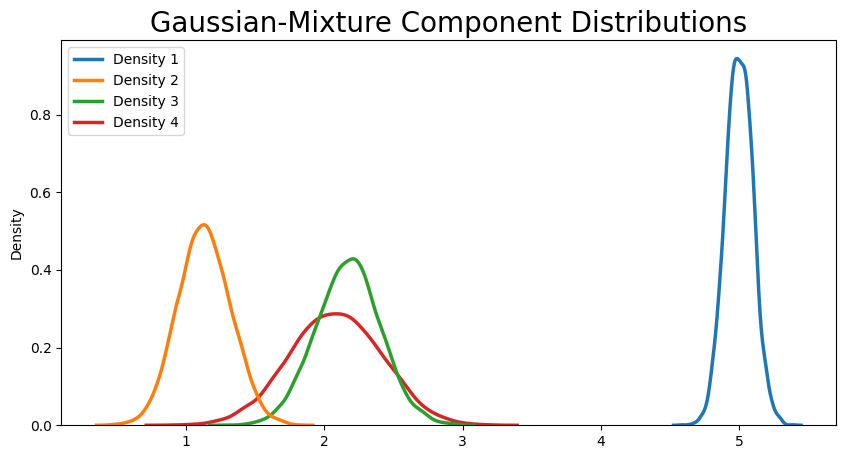

In [32]:
# Create Gaussian mixture component distributions and plot
mix_params = torch.split(
    torch.tensor(pred_params_gausmix.values[0, :]).reshape(1, -1), xgblss_gausmix.dist.M, dim=1
)
mix_params[1][0][0] += torch.tensor(0.1)  # Adjust std of first density for visualization

mix_dist = xgblss_gausmix.dist.create_mixture_distribution(mix_params)
gaus_samples = pd.DataFrame(
    mix_dist._component_distribution.sample((y_test.shape[0],)).reshape(-1, xgblss_gausmix.dist.M).numpy(),
    columns=[f"Density {i+1}" for i in range(xgblss_gausmix.dist.M)]
)

plt.figure(figsize=(10, 5))
sns.kdeplot(gaus_samples, lw=2.5)
plt.title("Gaussian-Mixture Component Distributions", fontsize=20)
plt.show()

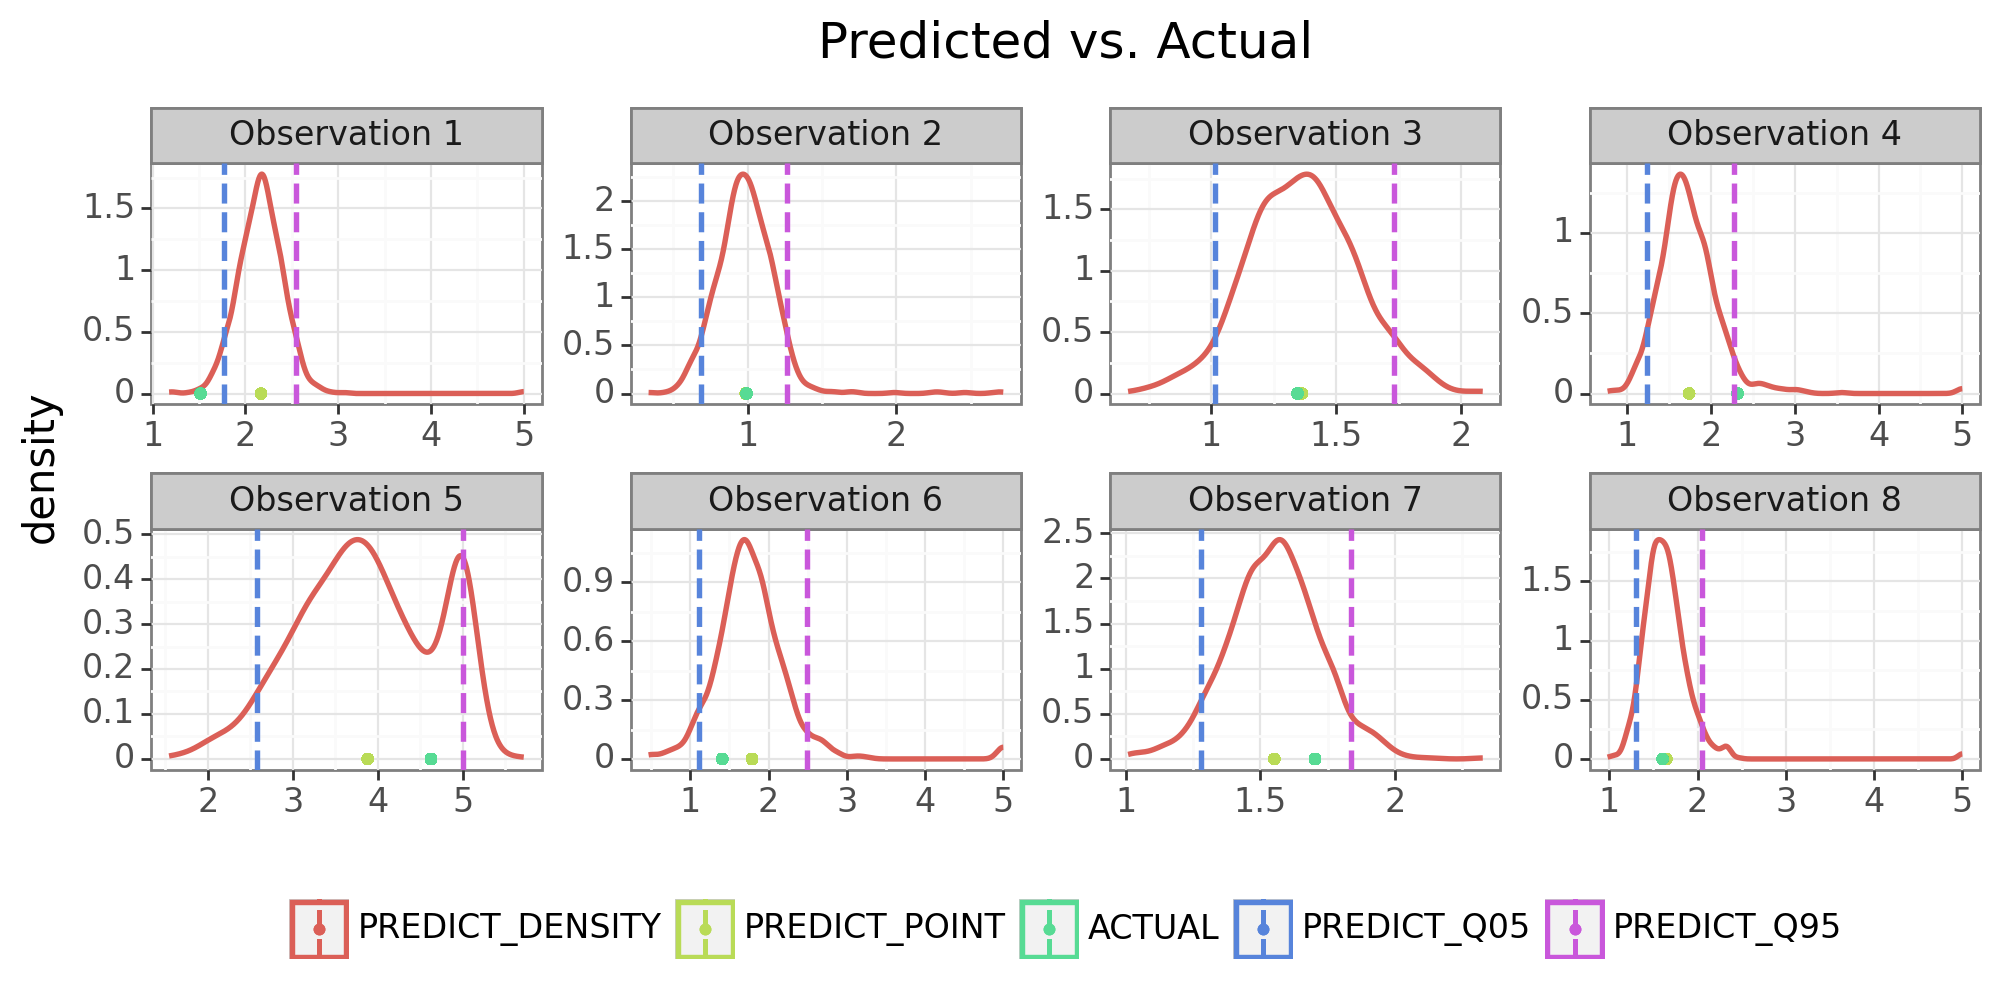

In [33]:
# Visualization of predicted vs. actual for selected observations
y_pred = []
n_examples = 8
samples_arr = pred_samples_gausmix.values.reshape(-1, n_samples)

for i in range(n_examples):
    y_samples = pd.DataFrame(samples_arr[i, :], columns=["PREDICT_DENSITY"])
    y_samples["PREDICT_POINT"] = y_samples["PREDICT_DENSITY"].mean()
    y_samples["PREDICT_Q05"] = y_samples["PREDICT_DENSITY"].quantile(q=selected_quantiles[0])
    y_samples["PREDICT_Q95"] = y_samples["PREDICT_DENSITY"].quantile(q=selected_quantiles[1])
    y_samples["ACTUAL"] = y_test.values[i]
    y_samples["obs"] = f"Observation {i+1}"
    y_pred.append(y_samples)

pred_df = pd.melt(pd.concat(y_pred, axis=0), id_vars="obs")
pred_df["obs"] = pd.Categorical(
    pred_df["obs"], categories=[f"Observation {i+1}" for i in range(n_examples)]
)
df_actual, df_pred_dens, df_pred_point, df_q05, df_q95 = [
    x for _, x in pred_df.groupby("variable")
]

plot_pred = (
    ggplot(pred_df, aes(color="variable"))
    + stat_density(df_pred_dens, aes(x="value"), size=1.1)
    + geom_point(df_pred_point, aes(x="value", y=0), size=1.4)
    + geom_point(df_actual, aes(x="value", y=0), size=1.4)
    + geom_vline(df_q05, aes(xintercept="value", fill="variable", color="variable"), linetype="dashed", size=1.1)
    + geom_vline(df_q95, aes(xintercept="value", fill="variable", color="variable"), linetype="dashed", size=1.1)
    + facet_wrap("obs", scales="free", ncol=4)
    + labs(title="Predicted vs. Actual", x="")
    + theme_bw(base_size=15)
    + theme(plot_title=element_text(hjust=0.5))
    + scale_fill_brewer(type="qual", palette="Dark2")
    + theme(legend_position="bottom", legend_title=element_blank())
)

print(plot_pred)

# Expectile Regression

In [34]:
# Initialize with Expectile distribution
xgblss_exp = XGBoostLSS(
    Expectile(
        stabilization="None",
        expectiles=[0.05, 0.95],
        penalize_crossing=True
    )
)

In [35]:
# Hyperparameter optimization
np.random.seed(123)

opt_param_xgb_exp = xgblss_exp.hyper_opt(
    param_dict_xgb,
    dtrain_xgb,
    num_boost_round=100,
    nfold=5,
    early_stopping_rounds=20,
    max_minutes=5,
    n_trials=30,
    silence=False,
    seed=123,
    hp_seed=None
)

opt_params_xgb_exp = opt_param_xgb_exp.copy()
n_rounds_exp = opt_params_xgb_exp["opt_rounds"]
del opt_params_xgb_exp["opt_rounds"]

  0%|          | 0/30 [00:00<?, ?it/s]


Hyper-Parameter Optimization successfully finished.
  Number of finished trials:  30
  Best trial:
    Value: 160.7195678
    Params: 
    eta: 0.11051488031191323
    max_depth: 8
    gamma: 0.3204979598277318
    subsample: 0.758099403860079
    colsample_bytree: 0.9995105173538519
    min_child_weight: 4.277337318693532e-07
    booster: gbtree
    opt_rounds: 98


In [36]:
# Train the model
xgblss_exp.train(
    opt_params_xgb_exp,
    dtrain_xgb,
    num_boost_round=n_rounds_exp
)

In [37]:
# Predicted expectiles
pred_expectile = xgblss_exp.predict(
    dtest_xgb,
    pred_type="expectiles"
)

display(pred_expectile.head())

expectile_0.05  expectile_0.95
0        1.990405        2.514515
1        0.869073        1.167725
2        1.240732        1.783195
3        1.406021        1.966324
4        3.477717        4.724184

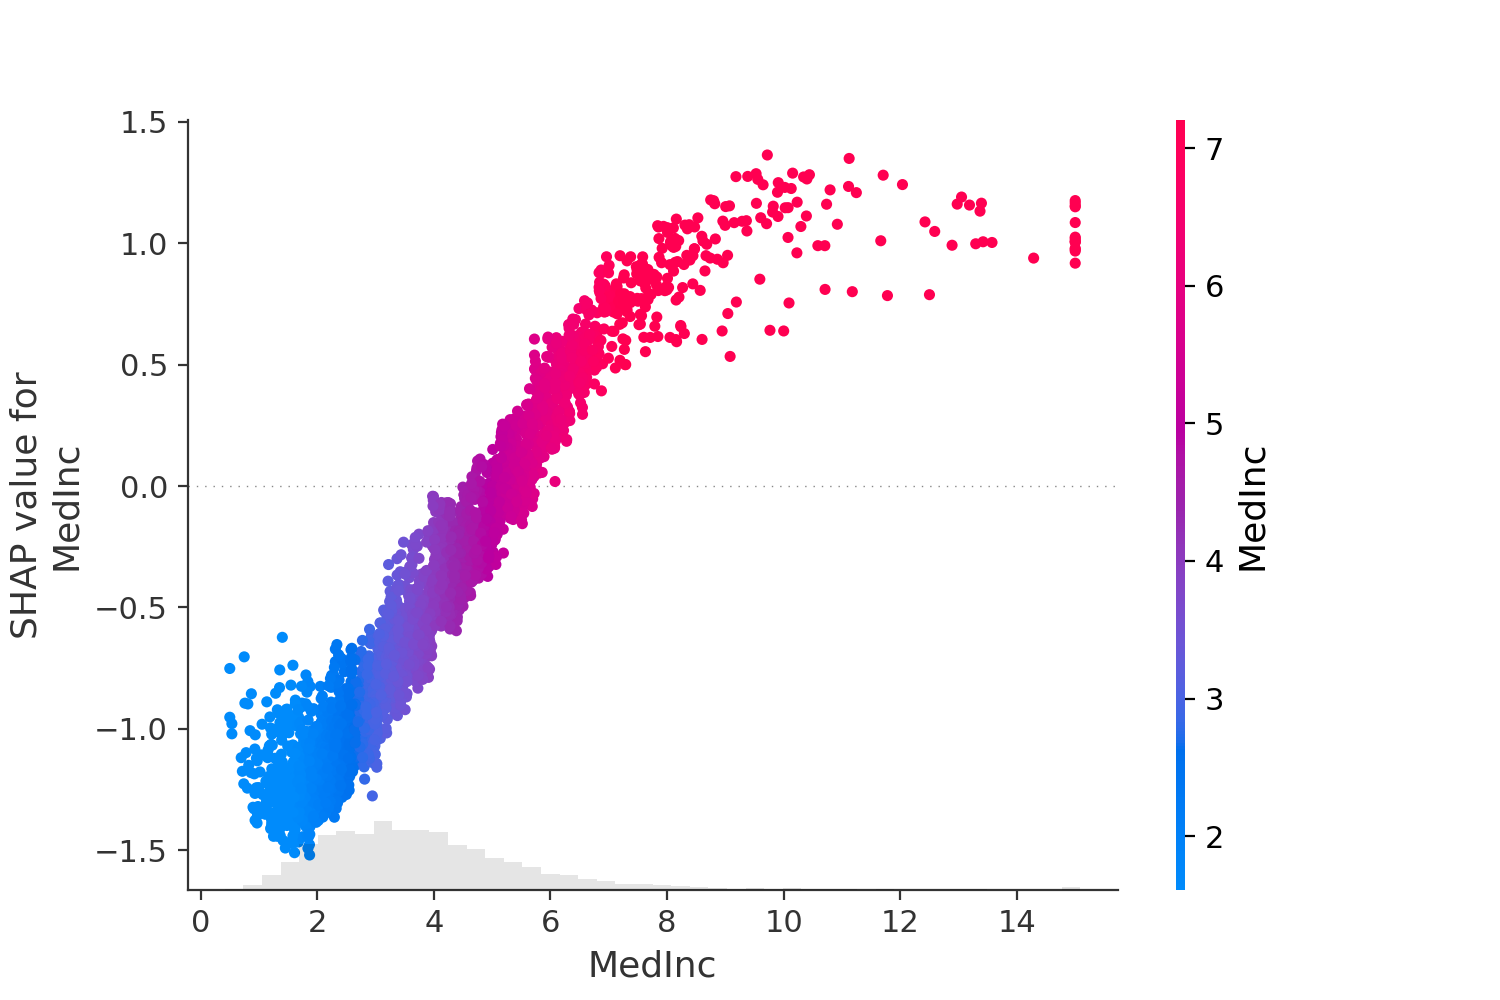

In [38]:
# Partial Dependence Plot of how the first feature acts on the selected expectile (0.95)
xgblss_exp.expectile_plot(
    X_test,
    expectile="expectile_0.95",
    feature=feature_names[0],
    plot_type="Partial_Dependence"
)

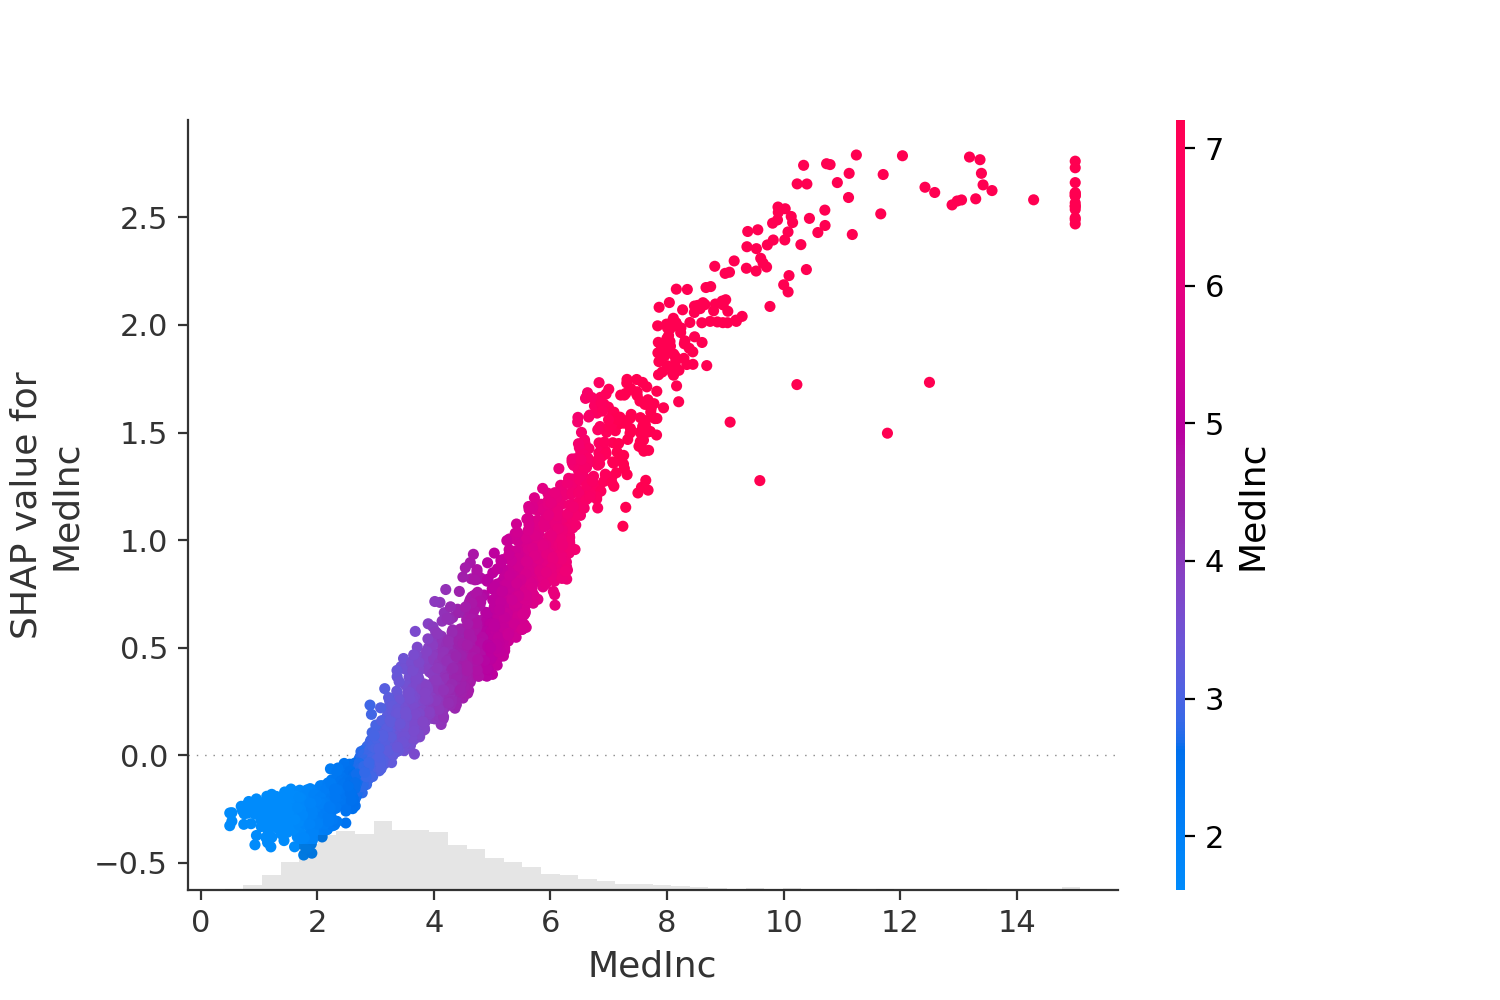

In [39]:
# Partial Dependence Plot of how the first feature acts on the selected expectile (0.05)
xgblss_exp.expectile_plot(
    X_test,
    expectile="expectile_0.05",
    feature=feature_names[0],
    plot_type="Partial_Dependence"
)

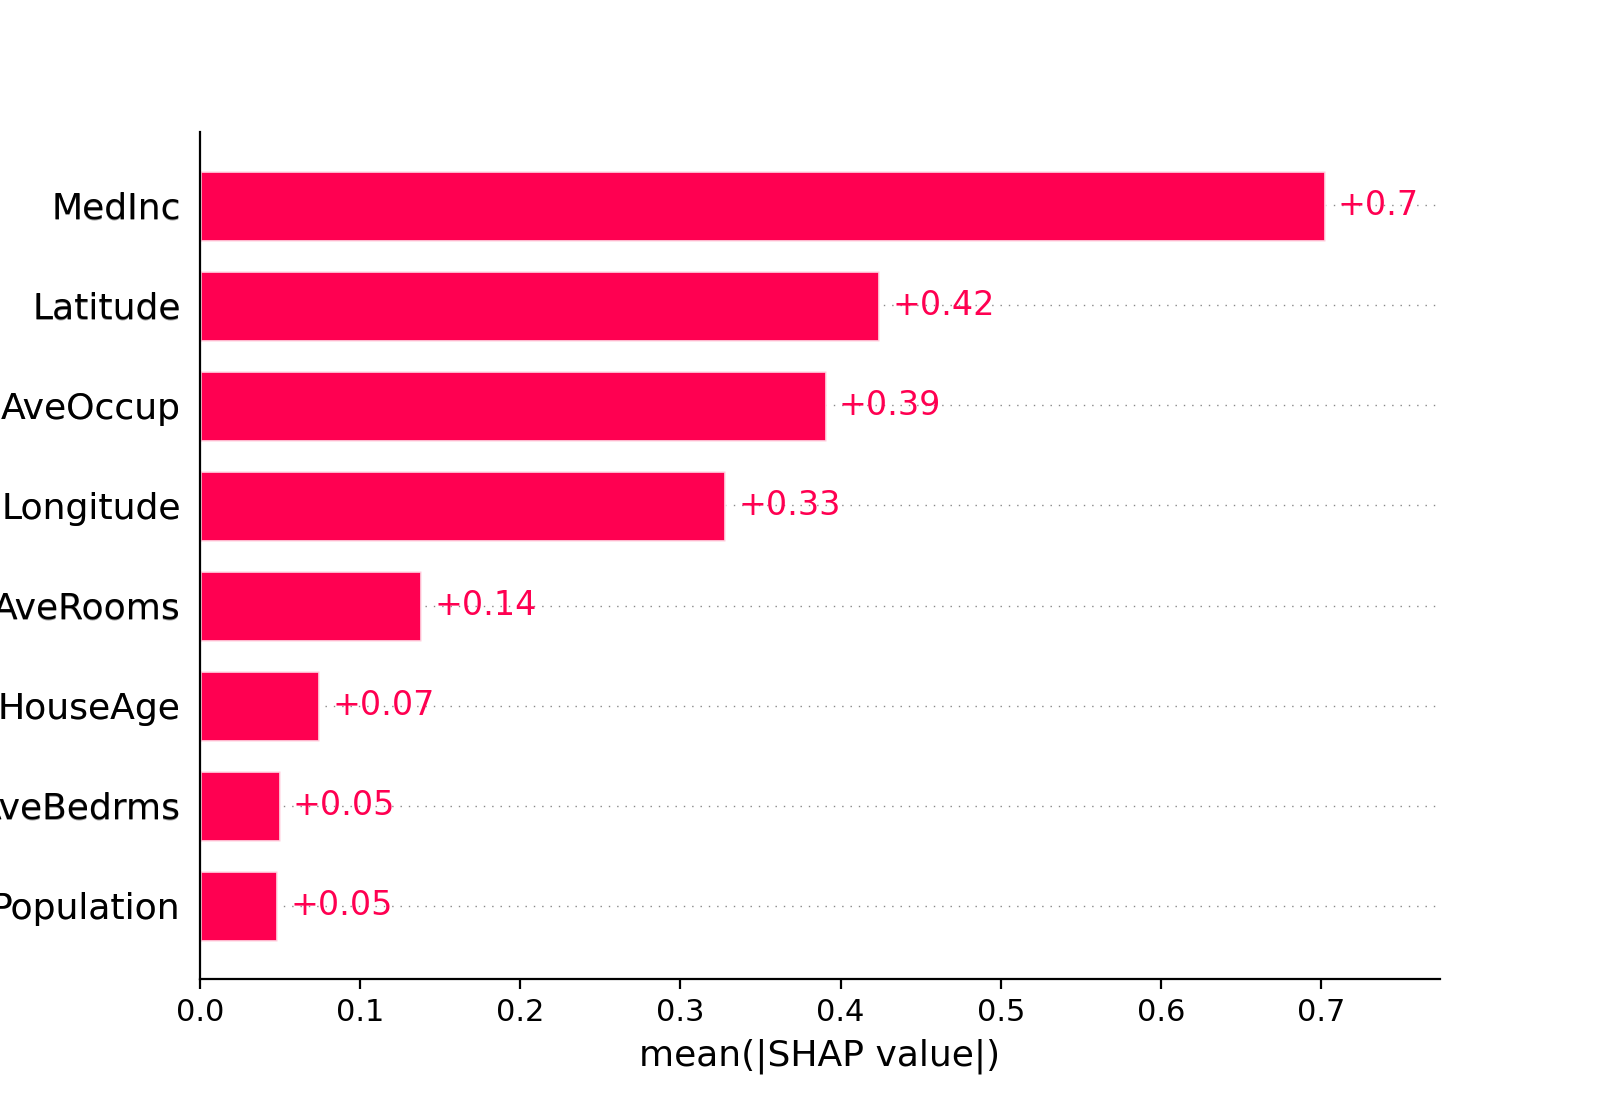

In [40]:
# Plot Feature Importance of the selected expectile
xgblss_exp.expectile_plot(
    X_test,
    expectile="expectile_0.95",
    plot_type="Feature_Importance"
)

In [41]:
!pip install -q pygam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 6.5 MB/s eta 0:00:00


In [42]:
from pygam import ExpectileGAM

# Add predicted expectiles to the test DataFrame
test_df = X_test.copy()
test_df['y'] = y_test.values
test_df['predicted_expectile_0.05'] = pred_expectile['expectile_0.05'].values
test_df['predicted_expectile_0.95'] = pred_expectile['expectile_0.95'].values

In [43]:
# Fit Expectile GAM for tau=0.05
gam_0_05 = ExpectileGAM(expectile=0.05).gridsearch(X_test.values, y_test.values)

# Fit Expectile GAM for tau=0.95
gam_0_95 = ExpectileGAM(expectile=0.95).gridsearch(X_test.values, y_test.values)

# Predict empirical expectiles
test_df['empirical_expectile_0.05'] = gam_0_05.predict(X_test.values)
test_df['empirical_expectile_0.95'] = gam_0_95.predict(X_test.values)

100% (11 of 11) |########################| Elapsed Time: 0:00:04 Time:  0:00:04
100% (11 of 11) |########################| Elapsed Time: 0:00:06 Time:  0:00:06


In [44]:
# Melt the DataFrame for plotting
df_melted = test_df.melt(
    id_vars=['y'],
    value_vars=['empirical_expectile_0.05', 'empirical_expectile_0.95',
                'predicted_expectile_0.05', 'predicted_expectile_0.95'],
    var_name='Expectile_Type',
    value_name='Expectile_Value'
)

# Map expectile types to make labels clearer
expectile_mapping = {
    'empirical_expectile_0.05': 'Empirical Expectile 0.05',
    'empirical_expectile_0.95': 'Empirical Expectile 0.95',
    'predicted_expectile_0.05': 'Predicted Expectile 0.05',
    'predicted_expectile_0.95': 'Predicted Expectile 0.95',
}

df_melted['Expectile_Type'] = df_melted['Expectile_Type'].map(expectile_mapping)

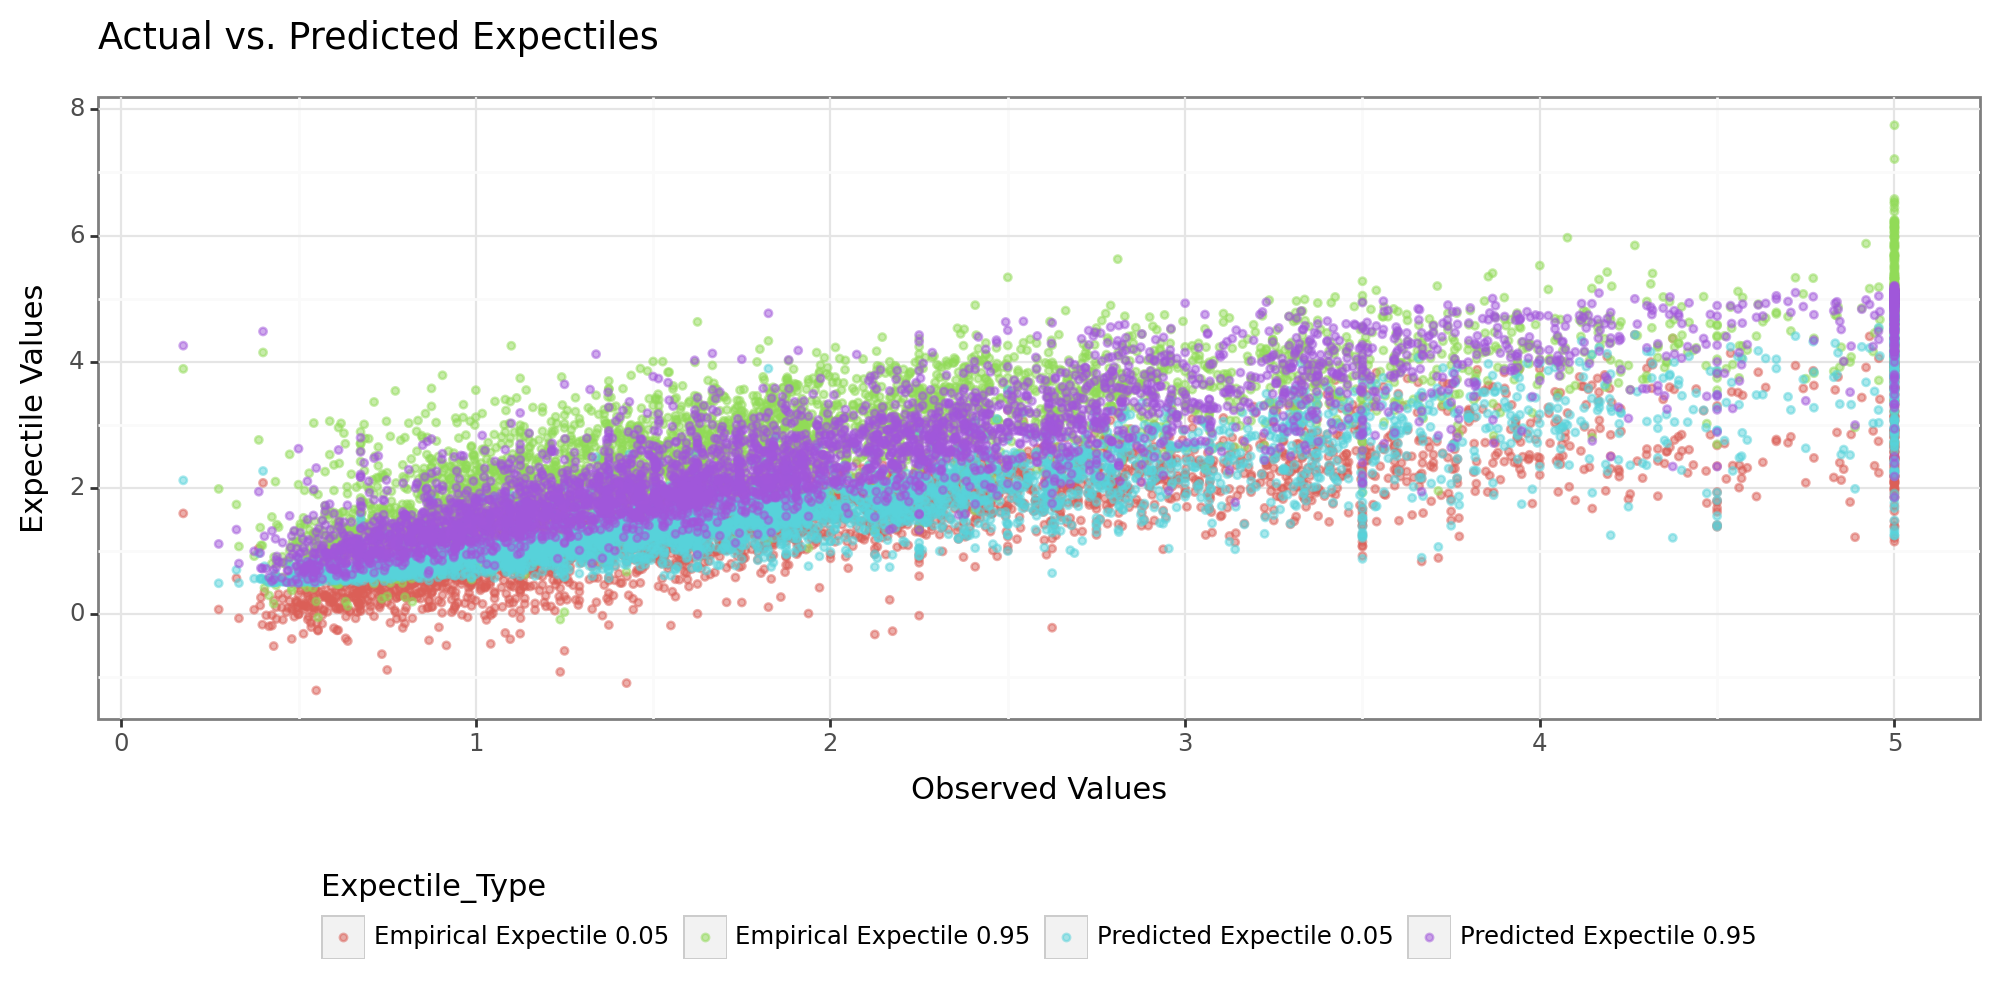

<Figure Size: (1000 x 500)>

In [45]:
# Plot Actual vs. Predicted Expectiles
(
    ggplot(df_melted, aes(x='y', y='Expectile_Value', color='Expectile_Type')) +
    geom_point(alpha=0.5, size=1) +
    labs(
        title='Actual vs. Predicted Expectiles',
        x='Observed Values',
        y='Expectile Values'
    ) +
    theme_bw() +
    theme(legend_position='bottom')
)

In [46]:
# Prepare the DataFrame for plotting
plot_df = test_df.copy()
feature_to_plot = 'MedInc'

# Melt the DataFrame for plotting
plot_df_melted = pd.melt(
    plot_df,
    id_vars=[feature_to_plot, 'y'],
    value_vars=['predicted_expectile_0.05', 'predicted_expectile_0.95',
                'empirical_expectile_0.05', 'empirical_expectile_0.95'],
    var_name='Expectile_Type',
    value_name='Expectile_Value'
)

# Map expectile types to make labels clearer
expectile_mapping = {
    'predicted_expectile_0.05': 'Predicted Expectile 0.05',
    'predicted_expectile_0.95': 'Predicted Expectile 0.95',
    'empirical_expectile_0.05': 'Empirical Expectile 0.05',
    'empirical_expectile_0.95': 'Empirical Expectile 0.95',
}

plot_df_melted['Expectile_Type'] = plot_df_melted['Expectile_Type'].map(expectile_mapping)

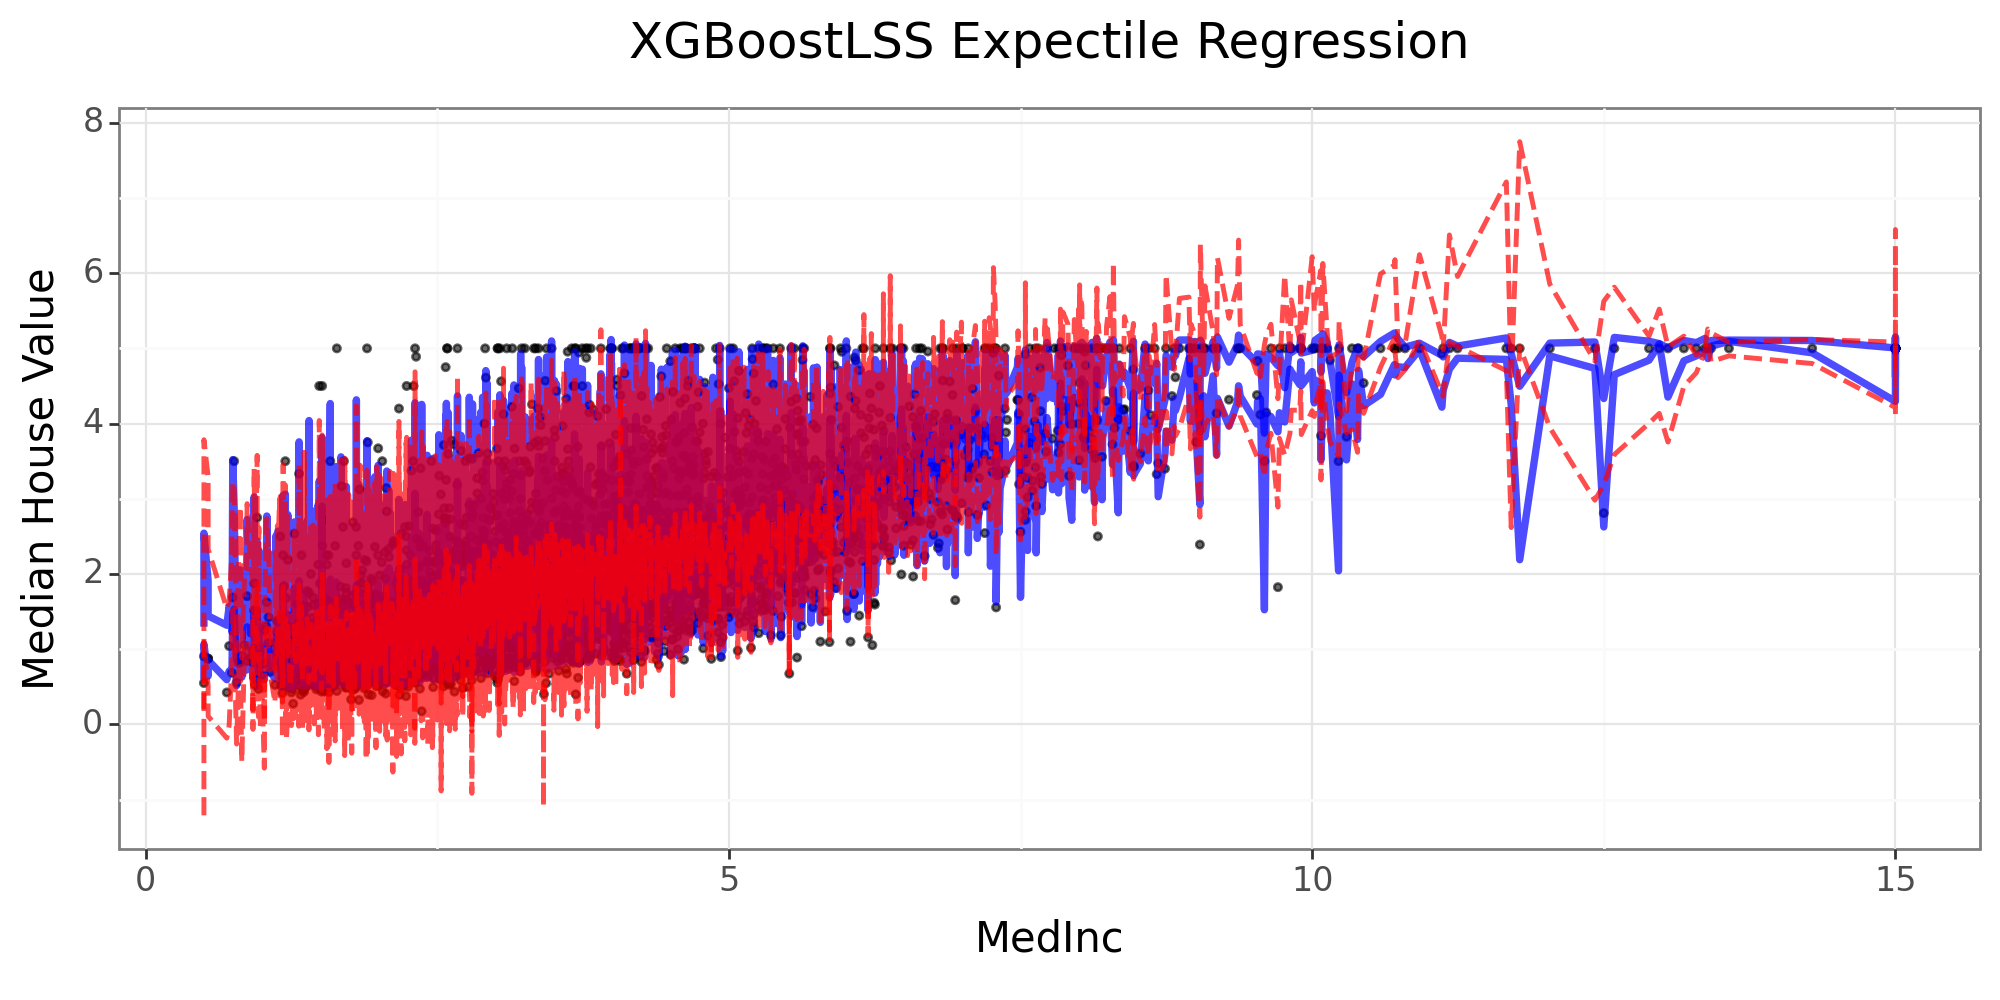

<Figure Size: (1000 x 500)>

In [47]:
# Plot
(
    ggplot(plot_df_melted, aes(x=feature_to_plot, y='y')) +
    geom_point(alpha=0.2, color='black', size=1) +
    geom_line(
        data=plot_df_melted[plot_df_melted['Expectile_Type'] == 'Predicted Expectile 0.05'],
        mapping=aes(y='Expectile_Value'),
        color='blue',
        size=1.5,
        alpha=0.7
    ) +
    geom_line(
        data=plot_df_melted[plot_df_melted['Expectile_Type'] == 'Predicted Expectile 0.95'],
        mapping=aes(y='Expectile_Value'),
        color='blue',
        size=1.5,
        alpha=0.7
    ) +
    geom_line(
        data=plot_df_melted[plot_df_melted['Expectile_Type'] == 'Empirical Expectile 0.05'],
        mapping=aes(y='Expectile_Value'),
        color='red',
        linetype='dashed',
        size=1,
        alpha=0.7
    ) +
    geom_line(
        data=plot_df_melted[plot_df_melted['Expectile_Type'] == 'Empirical Expectile 0.95'],
        mapping=aes(y='Expectile_Value'),
        color='red',
        linetype='dashed',
        size=1,
        alpha=0.7
    ) +
    theme_bw(base_size=15) +
    theme(
        legend_position="bottom",
        plot_title=element_text(hjust=0.5)
    ) +
    labs(
        title="XGBoostLSS Expectile Regression",
        x=feature_to_plot,
        y='Median House Value'
    )
)